In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X = np.random.randint(0, 2, size=(100, 12))
y_labels = np.random.randint(0, 2, size=(100,))
Y = np.eye(2)[y_labels]

# Сохранение в файлы
np.savetxt('dataIn.txt', X, fmt='%d')
np.savetxt('dataOut.txt', Y, fmt='%d')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape} + {y_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape} + {y_test.shape}")

Размер обучающей выборки: (70, 12) + (70, 2)
Размер тестовой выборки: (30, 12) + (30, 2)


In [3]:
model = keras.Sequential([
    #keras.layers.Dense(12, activation='linear', input_shape=(12,)),
    keras.layers.Dense(8, activation='log_sigmoid', input_shape=(12,)),
    keras.layers.Dense(2, activation='softmax')
])

# Компиляция
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy_mlp = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy MLP: {accuracy_mlp:.4f}")

Epoch 1/50


C:\Projects\BSU-AI\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5429 - loss: 1.4925 - val_accuracy: 0.3000 - val_loss: 2.0013
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 1.3894 - val_accuracy: 0.3000 - val_loss: 1.8545
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 1.2876 - val_accuracy: 0.3000 - val_loss: 1.7180
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5429 - loss: 1.2037 - val_accuracy: 0.3000 - val_loss: 1.5854
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 1.1162 - val_accuracy: 0.3000 - val_loss: 1.4717
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5429 - loss: 1.0529 - val_accuracy: 0.3000 - val_loss: 1.3597
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5429 - loss: 0.9829 - val_accuracy: 0.3000 - val_loss: 1.2647
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 0.9266 - val_accuracy: 0.3000 - val_loss: 1.1785
Epoch 9/50
9/9 ━━━

In [4]:
# Подготовка данных для классических алгоритмов
y_labels_flat = np.argmax(Y, axis=1)
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X, y_labels_flat, test_size=0.3, random_state=42
)

# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_ml, y_train_ml)
y_pred_lr = lr.predict(X_test_ml)
accuracy_lr = accuracy_score(y_test_ml, y_pred_lr)
print(f"Accuracy Logistic Regression: {accuracy_lr:.4f}")

# Случайный лес
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_ml, y_train_ml)
y_pred_rf = rf.predict(X_test_ml)
accuracy_rf = accuracy_score(y_test_ml, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.4f}")

Accuracy Logistic Regression: 0.4333
Accuracy Random Forest: 0.4667


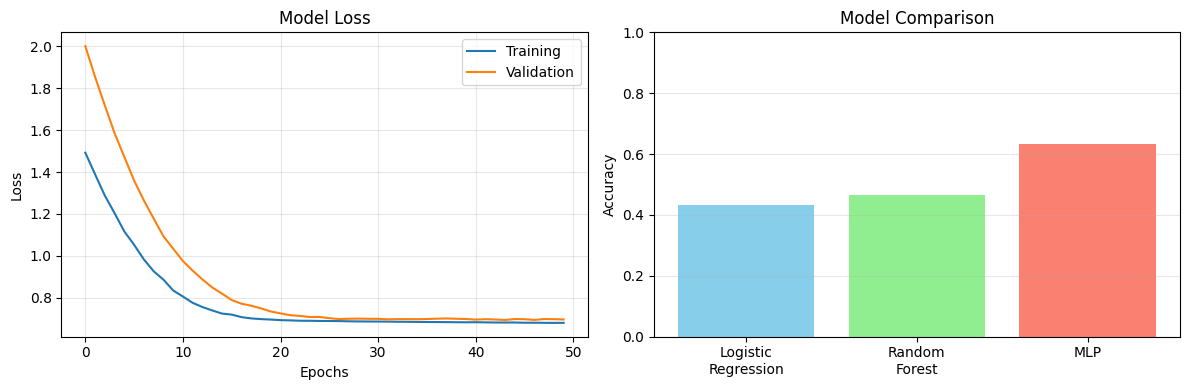

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Потери
axes[0].plot(history.history['loss'], label='Training')
axes[0].plot(history.history['val_loss'], label='Validation')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Сравнение моделей
models = ['Logistic\nRegression', 'Random\nForest', 'MLP']
accuracies = [accuracy_lr, accuracy_rf, accuracy_mlp]

bars = axes[1].bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Comparison')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [6]:
print(f"Accuracy Logistic Regression: {accuracy_lr:.4f}")
print(f"Accuracy Random Forest: {accuracy_rf:.4f}")
print(f"Accuracy MLP: {accuracy_mlp:.4f}")

Accuracy Logistic Regression: 0.4333
Accuracy Random Forest: 0.4667
Accuracy MLP: 0.6333


In [7]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Train Loss: {final_train_loss:.4f}")
print(f"Final Val Loss:   {final_val_loss:.4f}")
print(f"Difference:       {abs(final_train_loss - final_val_loss):.4f}")
# Найти эпоху с минимальной val_loss
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = history.history['val_loss'][best_epoch-1]
print(f"Best validation loss: {best_val_loss:.4f} at epoch {best_epoch}")

Final Train Loss: 0.6803
Final Val Loss:   0.6965
Difference:       0.0162
Best validation loss: 0.6940 at epoch 44


In [8]:
if history.history['val_loss'][-1] > history.history['val_loss'][-10]:
    print("Возможно переобучение!")
else:
    print("Переобучения нет.")

Возможно переобучение!


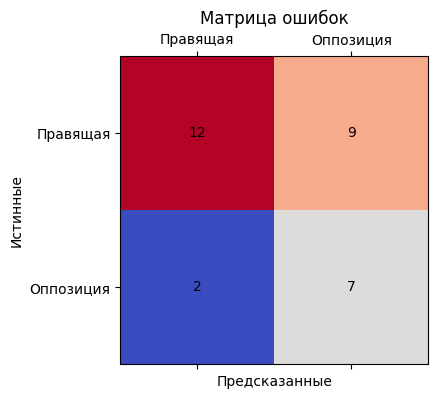

In [9]:
# Матрица ошибок
cm = confusion_matrix(y_true_labels, y_pred_labels)

fig, ax = plt.subplots(figsize=(5, 4))
cax = ax.matshow(cm, cmap='coolwarm')
plt.title('Матрица ошибок')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center')

plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Правящая', 'Оппозиция'])
ax.set_yticklabels(['Правящая', 'Оппозиция'])

plt.show()